<a href="https://colab.research.google.com/github/AkshayMetry/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

diabetes_dataset=pd.read_csv('/content/drive/MyDrive/DiabetesPrediction_dataset/diabetes.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.shape

(768, 9)

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


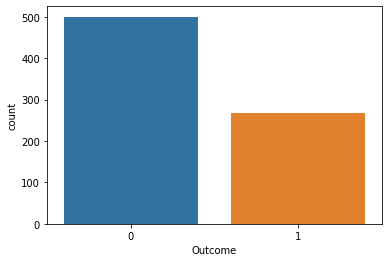

In [ ]:
sns.countplot(x='Outcome',data=diabetes_dataset)


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Glucose')

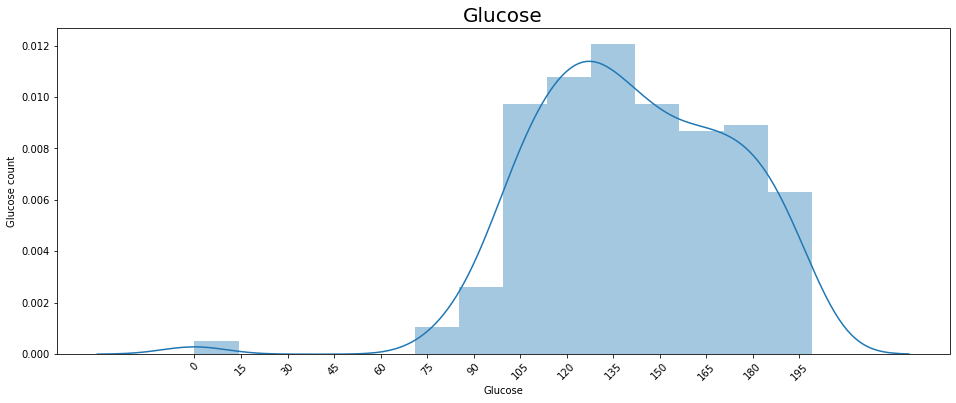

In [ ]:
fig = plt.figure(figsize =(16,6))

sns.distplot(diabetes_dataset["Glucose"][diabetes_dataset["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Insulin')

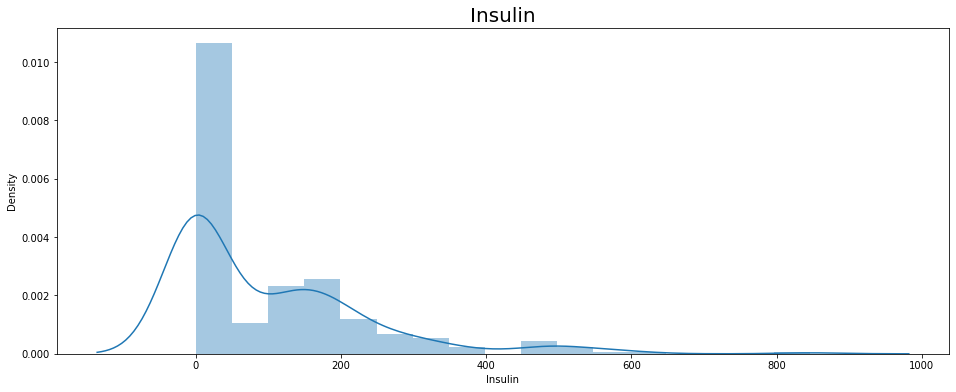

In [ ]:
fig = plt.figure(figsize = (16,6))

sns.distplot(diabetes_dataset["Insulin"][diabetes_dataset["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI')

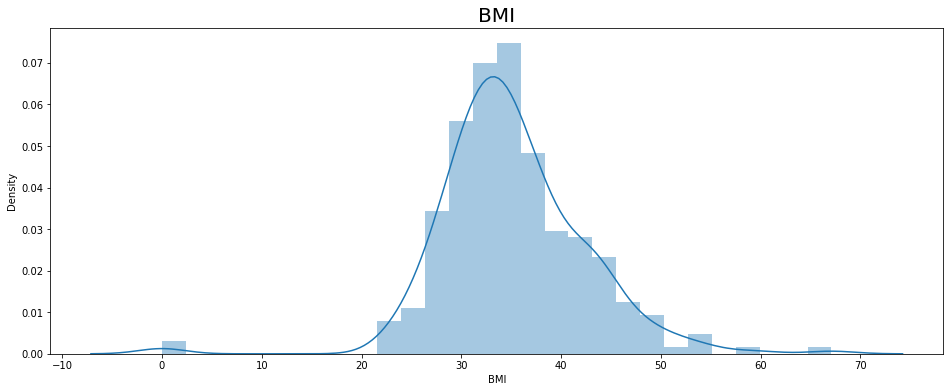

In [ ]:
fig = plt.figure(figsize =(16,6))

sns.distplot(diabetes_dataset["BMI"][diabetes_dataset["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'diabetespedigreefunction')

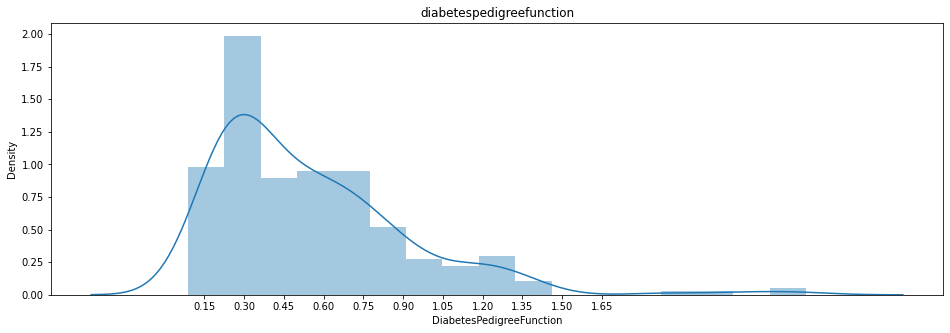

In [ ]:
fig = plt.figure(figsize = (16,5))
sns.distplot(diabetes_dataset["DiabetesPedigreeFunction"][diabetes_dataset["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("diabetespedigreefunction")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

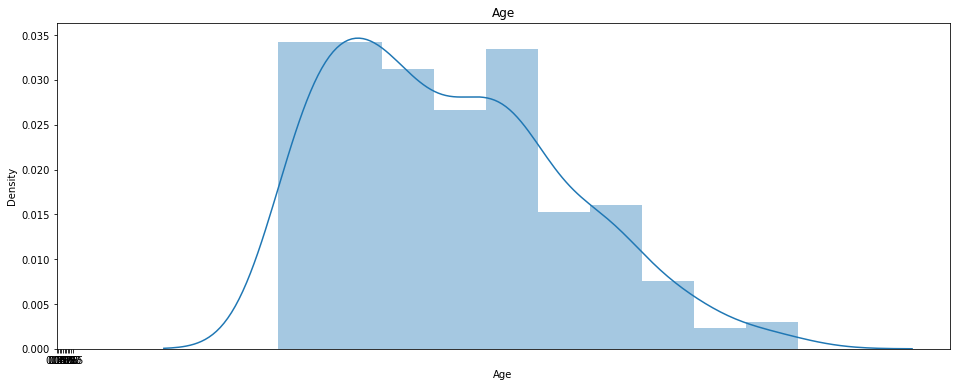

In [ ]:
fig = plt.figure(figsize = (16,6))

sns.distplot(diabetes_dataset["Age"][diabetes_dataset["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Age")

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify=Y, random_state=0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (691, 8) (77, 8)


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear',C=500)

In [ ]:
classifier.fit(X_train, Y_train)

SVC(C=500, kernel='linear')

Accuracy Score

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7814761215629522


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8181818181818182


Making a Predictive System

In [ ]:
# input_data = (6,148,72,35,0,33.6,0.627,50)
input_data = (8,	183,	64,	0,	0,	23.3,	0.672,32)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]]
[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Logistic Regression

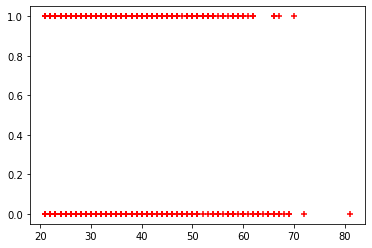

In [ ]:
plt.scatter(diabetes_dataset.Age,diabetes_dataset.Outcome,marker='+',color='red')

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (691, 8) (77, 8)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
X_test


array([[ 3.42980797e-01,  2.06891246e+00,  3.56431752e-01,
         4.05445437e-01,  1.10446888e+00,  1.47320522e+00,
         1.69768028e+00,  1.68125866e+00],
       [-8.44885053e-01, -7.47830617e-01, -1.60545747e-01,
        -3.47291297e-01,  5.22714857e-01, -1.11594738e+00,
         4.56753625e-02, -9.56461683e-01],
       [-5.47918591e-01,  2.22380888e-01, -2.63941247e-01,
         1.34636635e+00, -6.92890572e-01,  1.01629594e+00,
         1.90002823e+00, -7.86286177e-01],
       [-8.44885053e-01, -1.15469351e+00, -2.63941247e-01,
         1.54533192e-01,  3.05642459e-01,  6.22846281e-01,
        -2.64653629e-03, -4.45935165e-01],
       [-8.44885053e-01, -7.47830617e-01, -2.63941247e-01,
        -9.63790522e-02,  1.91068934e-02, -1.75054361e+00,
        -5.22106949e-01, -1.04154944e+00],
       [-2.50952128e-01,  1.31778097e+00,  4.62452528e-02,
        -1.59107113e-01,  2.18813500e-01, -4.98257194e-02,
        -6.15730628e-01, -4.45935165e-01],
       [-5.47918591e-01, -2.783734

In [ ]:
x_train= scaler.fit_transform(X_train)    
x_test= scaler.transform(X_test)  
model.fit(x_train, Y_train)  

LogisticRegression()

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:

model.predict_proba(X_test)

array([[0.04406968, 0.95593032],
       [0.94757731, 0.05242269],
       [0.39906539, 0.60093461],
       [0.88372184, 0.11627816],
       [0.96836197, 0.03163803],
       [0.49537674, 0.50462326],
       [0.81318122, 0.18681878],
       [0.51929973, 0.48070027],
       [0.18842795, 0.81157205],
       [0.93916952, 0.06083048],
       [0.48390648, 0.51609352],
       [0.1995106 , 0.8004894 ],
       [0.36480658, 0.63519342],
       [0.8863663 , 0.1136337 ],
       [0.92680048, 0.07319952],
       [0.76181551, 0.23818449],
       [0.30071521, 0.69928479],
       [0.65798595, 0.34201405],
       [0.89214326, 0.10785674],
       [0.95843913, 0.04156087],
       [0.91417599, 0.08582401],
       [0.86127418, 0.13872582],
       [0.89152059, 0.10847941],
       [0.81181662, 0.18818338],
       [0.09955664, 0.90044336],
       [0.25277852, 0.74722148],
       [0.73755444, 0.26244556],
       [0.85288105, 0.14711895],
       [0.64766854, 0.35233146],
       [0.89198244, 0.10801756],
       [0.

In [ ]:
model.score(X_test,Y_test)

0.8181818181818182

Decison Tree

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:

feature_cols = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']
X = diabetes_dataset[feature_cols] # Features
y = diabetes_dataset.Outcome # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)


Confusion Matrix:
[[116  30]
 [ 46  39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       146
           1       0.57      0.46      0.51        85

    accuracy                           0.67       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.66      0.67      0.66       231



In [ ]:
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Accuracy: 0.670995670995671


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[128  18]
 [ 36  49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       146
           1       0.73      0.58      0.64        85

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231

Accuracy: 0.7662337662337663
